In [1]:
import re,glob,os,json
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

import baltic as bt
from scipy.stats import gaussian_kde

typeface='HelveticaNeue'
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.weight']=400
mpl.rcParams['axes.labelweight']=400
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['text.usetex']=True

mpl.rcParams.update({
#     'backend': 'wxAgg',
    "text.usetex": True,
    "font.family": "sans-serif", 
    "font.sans-serif": ['Helvetica Neue']})

mpl.rcParams['text.latex.preamble'] = r'\usepackage{cmbright}'

In [2]:
def hpd(data, level=0.95):
    """
    Return highest posterior density interval from a list,
    given the percent posterior density interval required.
    """
    d = list(data)
    d.sort()

    nData = len(data)
    nIn = int(round(level * nData))
    if nIn < 2 :
        return None
    #raise RuntimeError("Not enough data. N data: %s"%(len(data)))
 
    i = 0
    r = d[i+nIn-1] - d[i]
    for k in range(len(d) - (nIn - 1)) :
        rk = d[k+nIn-1] - d[k]
        if rk < r :
            r = rk
            i = k

    assert 0 <= i <= i+nIn-1 < len(d)
 
    return (d[i], d[i+nIn-1])

# import os,glob,re

# base_path='/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/data/Fig2/'
base_path='/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/Fig2/'

# burnin=10e5
lengths={}
for logfile in glob.glob(os.path.join(base_path,'*.dNdS.log')):
    seg=os.path.basename(logfile).split('.')[0]
    print(seg)
    for line in open(logfile,'r'):
        l=line.strip('\n').split('\t')
        if l[0]=='state':
            
            L=len(l)-1
            lengths[seg]=L
            
burnin=10e5
Ns={}
Ss={}

raw_Ns={}
raw_Ss={}

uNs={}
uSs={}

mcmc=re.compile('tree STATE_([0-9]+) ')
blen=re.compile('\]([0-9\-Ee\.]+)[\),]')
N_re=re.compile('.total_N=([0-9\.\-eE]+),')
S_re=re.compile('.total_S=([0-9\.\-eE]+),')

uN_re=re.compile('.utotal_N=([0-9\.\-eE]+)')
uS_re=re.compile('.utotal_S=([0-9\.\-eE]+),')

for treefile in glob.glob(os.path.join(base_path,'*.rc.trees')):
    seg=os.path.basename(treefile).split('.')[0]
    print(seg)
    
    Ns[seg]=[]
    Ss[seg]=[]
    
    raw_Ns[seg]=[]
    raw_Ss[seg]=[]
    
    uNs[seg]=[]
    uSs[seg]=[]
    
    for line in open(treefile,'r'):
        l=line.strip('\n')
        cerb=mcmc.match(l)
        if cerb and int(cerb.group(1))>=burnin:
            lens=blen.findall(l)
            N=N_re.search(l)
            S=S_re.search(l)
            
            uN=uN_re.search(l)
            uS=uS_re.search(l)
            
            try:
                N.group(1)
            except:
                print(l)
                
            Ns[seg].append(float(N.group(1))/lengths[seg]/sum(map(float,lens))) ## non-synonymous changes per codon per tree length
            Ss[seg].append(float(S.group(1))/lengths[seg]/sum(map(float,lens)))
        
            raw_Ns[seg].append(float(N.group(1)))
            raw_Ss[seg].append(float(S.group(1)))
            
            uNs[seg].append(float(uN.group(1)))
            uSs[seg].append(float(uS.group(1)))
            
    print(seg,'%.3f * 10^-3'%(np.mean(Ns[seg])*10**3),'(%s)'%(', '.join(['%.3f'%(n*10**3) for n in hpd(Ns[seg],0.95)])),'%.3f * 10^3'%(np.mean(Ss[seg])*10**3))

gp64
hypothetical
hypothetical2
hypothetical3
NP
PA
PB1
PB2
gp64
gp64 1.466 * 10^-3 (1.110, 1.847) 3.527 * 10^3
hypothetical
hypothetical 0.576 * 10^-3 (0.413, 0.748) 1.508 * 10^3
hypothetical2
hypothetical2 1.012 * 10^-3 (0.749, 1.319) 2.133 * 10^3
hypothetical3
hypothetical3 1.935 * 10^-3 (1.364, 2.475) 2.264 * 10^3
NP
NP 0.715 * 10^-3 (0.502, 0.913) 2.611 * 10^3
PA
PA 0.685 * 10^-3 (0.527, 0.863) 4.408 * 10^3
PB1
PB1 0.496 * 10^-3 (0.370, 0.623) 3.673 * 10^3
PB2
PB2 0.498 * 10^-3 (0.349, 0.645) 4.290 * 10^3


hypothetical3


/tmp/ipykernel_682/2494084353.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[0,:])


hypothetical2
hypothetical
gp64
NP
PA
PB2
PB1

Tree height: 4.615564
Tree length: 44.275767
strictly bifurcating tree

Numbers of objects in tree: 149 (74 nodes and 75 leaves)


Tree height: 6.043157
Tree length: 62.896146
strictly bifurcating tree

Numbers of objects in tree: 131 (65 nodes and 66 leaves)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


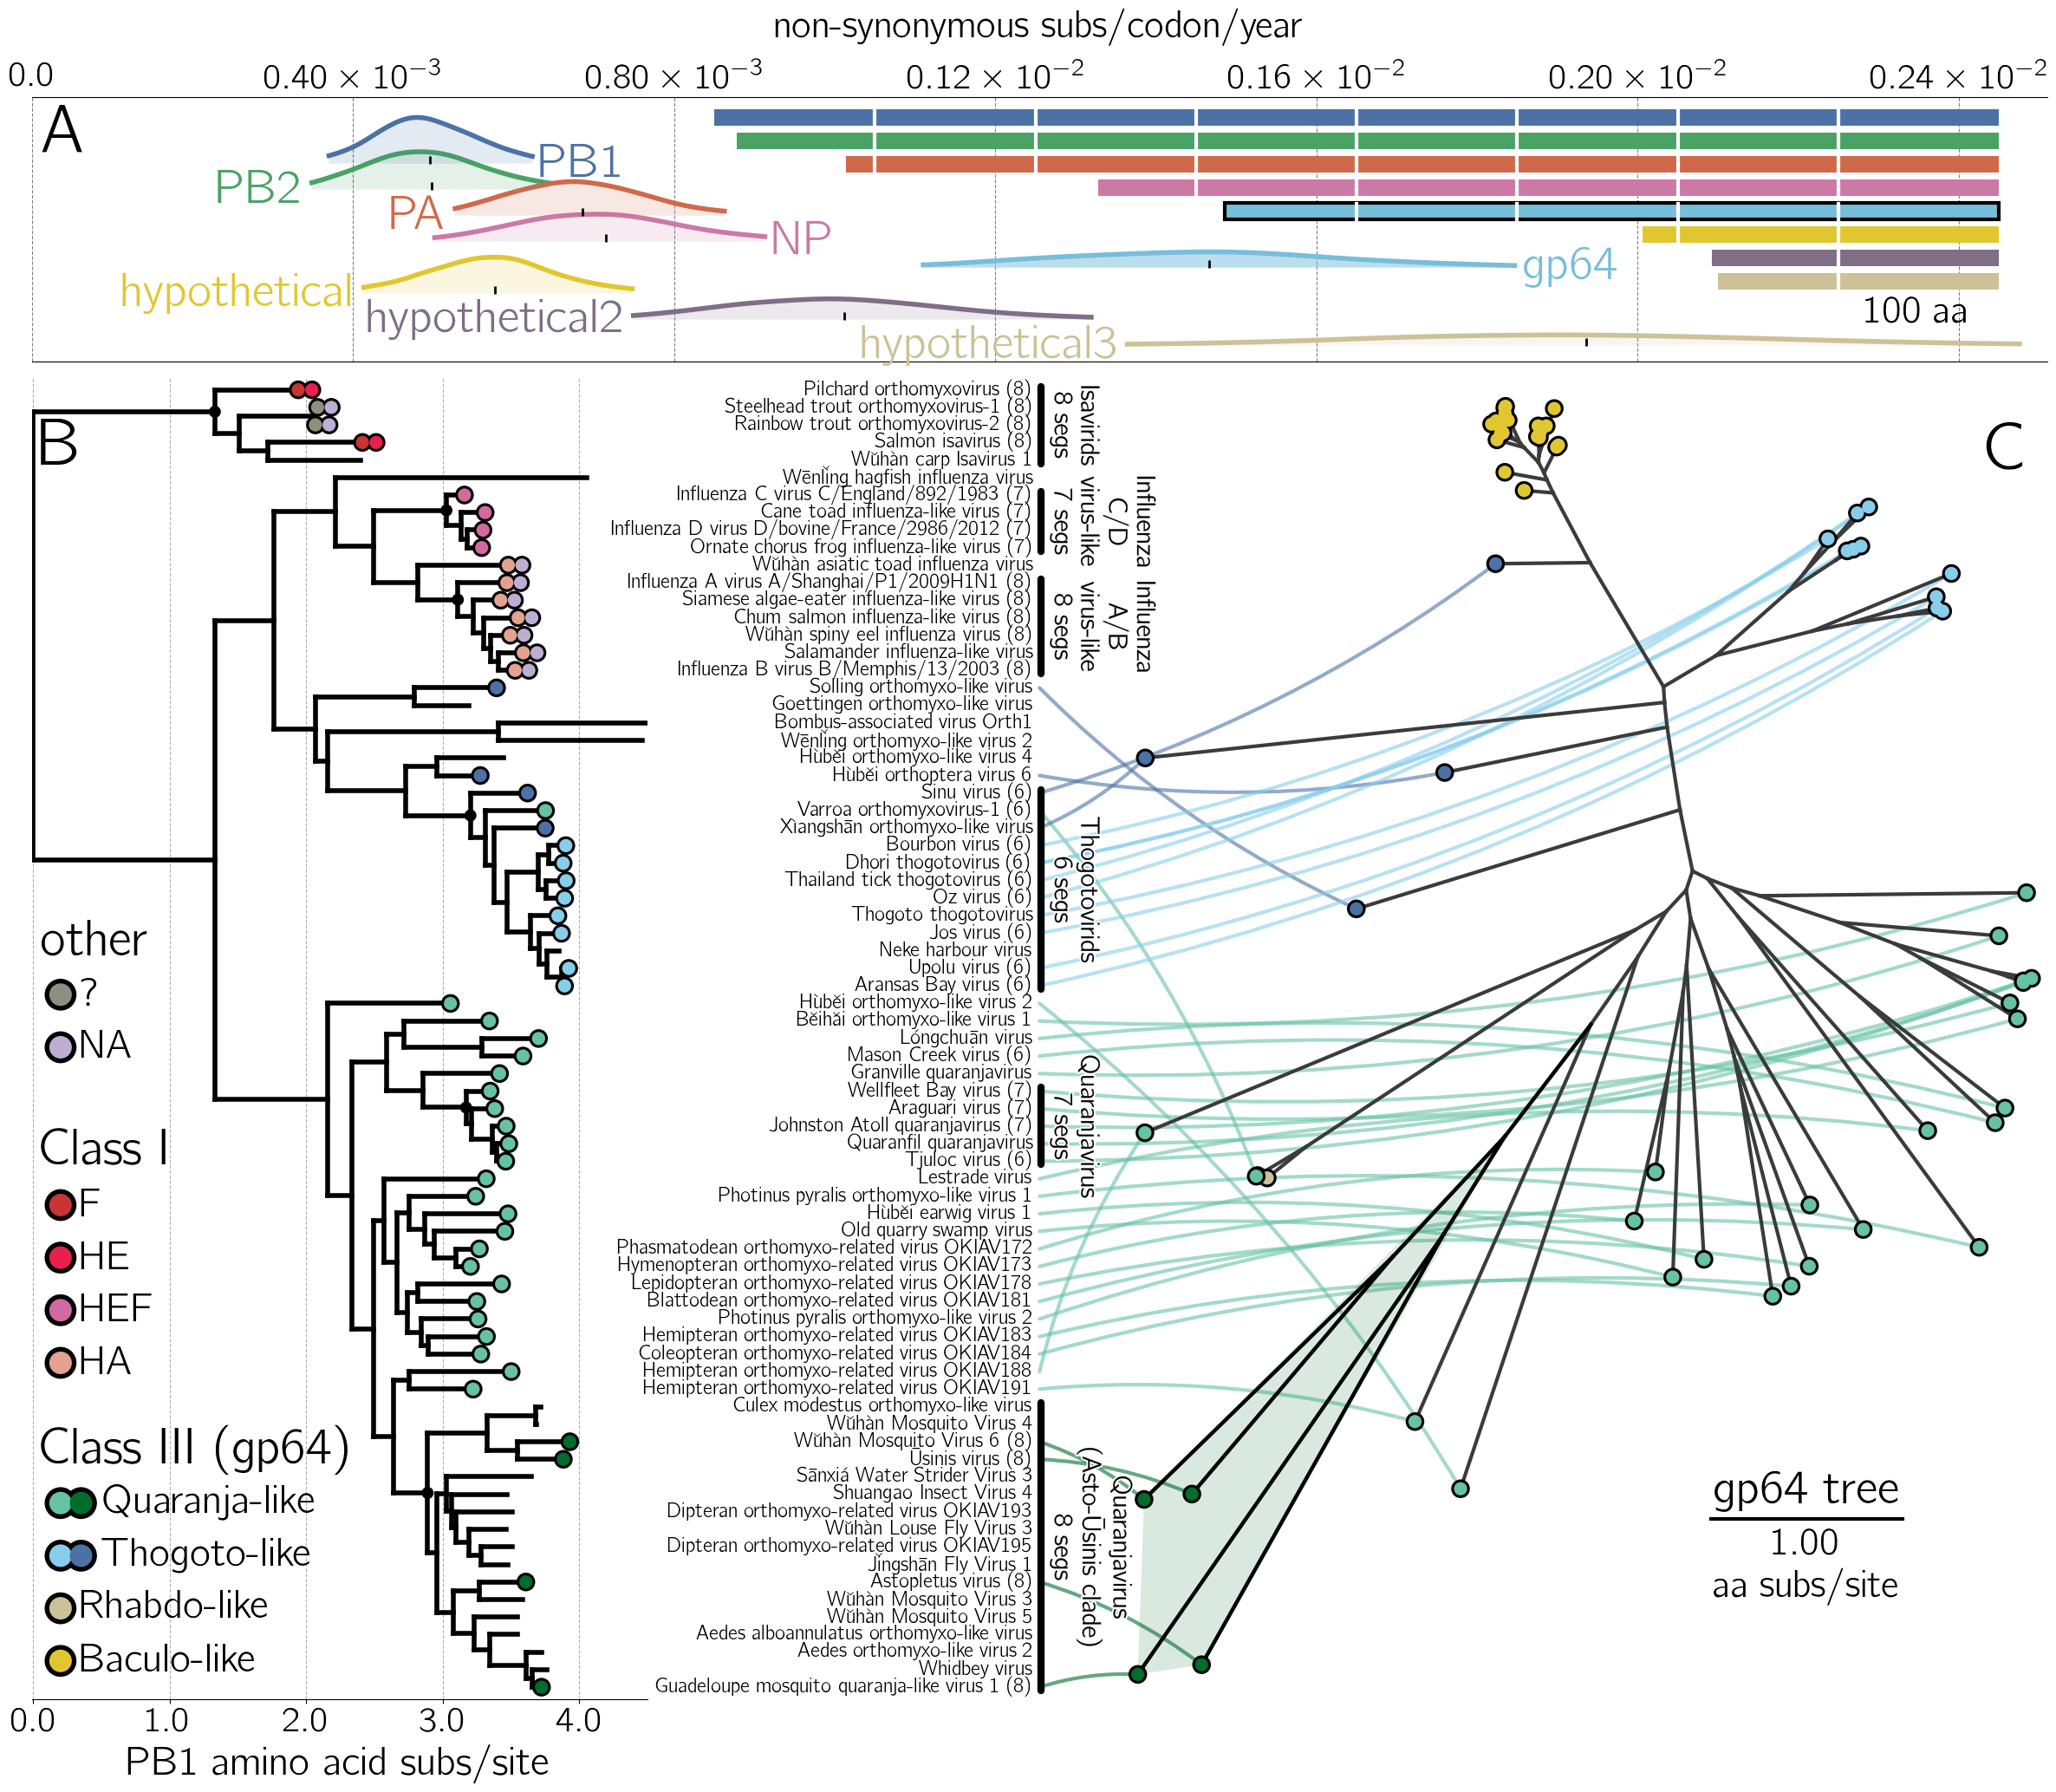

In [3]:

virus_segments={'CEE50061|Influenza D virus D/bovine/France/2986/2012|': 7, 
                'BAV18505|Influenza C virus C/England/892/1983|Homo sapiens': 7, 
                'AAU94857|Influenza B virus B/Memphis/13/2003|': 8, 
                'BAJ10041|Influenza A virus A/Shanghai/P1/2009H1N1|homo sapiens 24 year-old female': 8, 
                'YP_009553280|Oz virus|Amblyomma testudinarium': 6, 
                'QFR36189|Thailand tick thogotovirus|Boophilus sp.': 6, 
                'QCF29600|Bourbon virus|Amblyomma americanum': 6, 
                'QBQ64972|Dhori thogotovirus|Dermacentor nuttalli': 6, 
                'YP_009352882|Dhori thogotovirus|': 6, 
                'APP91612|Sinu virus|mosquitoes': 6, 
                'QGA69818|Varroa orthomyxovirus-1|Apis mellifera': 6, 
                'MT926372|Ornate chorus frog influenza-like virus|Microhyla fissipes': 7, 
                'MT926379|Siamese algae-eater influenza-like virus|Crossocheilus oblongus': 8, 
                'MT926402|Chum salmon influenza-like virus|Oncorhynchus keta': 8, 
                'AVM87621|Wuhan spiny eel influenza virus|Macrognathus aculeatus': 8, 
                'MT926395|Cane toad influenza-like virus|': 7, 
                'AED98371|Jos virus|': 6, 
                'AHB34055|Upolu virus|': 6, 
                'AHB34061|Aransas Bay virus|': 6, 
                'QFQ60710|Mason Creek virus|Cyanocitta cristata': 6, 
                'YP_009110686|Wellfleet Bay virus|Somateria mollissima': 7, 
                'ASR92124|Araguari virus|Philander opossum': 7, 
                'YP_009665204|Johnston Atoll quaranjavirus|tick': 7, 
                'AFN73049|Tjuloc virus|Argas arboreus': 6, 
                'CMS001_036_Ra_S20|Wuhan Mosquito Virus 6|Culex quinquefasciatus': 8, 
                'CMS001_027_Ra_S16|Astopletus virus|Culex tarsalis': 8, 
                'CMS002_017e_Rb_S126_L004|Guadeloupe mosquito quaranja-like virus 1|Aedes aegypti': 8, 
                'CMS002_026e_Rb_S150_L004|Usinis virus|Aedes albopictus': 8, 
                'MN241400|Pilchard orthomyxovirus|pilchard': 8, 
                'KX880091|Rainbow trout orthomyxovirus-2|rainbow trout': 8, 
                'AQM37684.1|Steelhead trout orthomyxovirus-1|steelhead trout': 8, 
                'AQT26412|Salmon isavirus|Atlantic salmon': 8} ## number of known segments


fig = plt.subplots(figsize=(30,24),facecolor='w')
gs = GridSpec(2, 2,height_ratios=[1,5],width_ratios=[2,3],hspace=0.02,wspace=0.62)

#########################################

ax = plt.subplot(gs[0,:])

segments=['PB1','PB2','PA','NP','gp64','hypothetical','hypothetical2','hypothetical3']

def plotKDE(ax,obs,offset,outline=False,rescale=1/5000.0,**kwargs):
    kde=gaussian_kde(obs)
    
    hpdLo,hpdHi=hpd(obs,0.95)
    
    x_grid=np.linspace(hpdLo,hpdHi,100)
    y_grid=kde(x_grid)
    y_grid=y_grid*rescale
    
    if outline==False:
        ax.fill_between(x_grid,[offset+y for y in y_grid],[offset for y in y_grid],**kwargs)
    else:
        ax.plot(x_grid,[offset+y for y in y_grid],**kwargs)
        
    return ax
    
ypos=[]
colours={'PB1': "#4c72a5", 
         'PB2': "#48a365", 
         'PA': "#d0694a", 
         'NP': "#cc79a7", 
         'gp64': "#77bedb", 
         'hypothetical': "#e1c72f", 
         'hypothetical2': "#7f6e85", 
         'hypothetical3': "#ccc197"}

for i,seg in enumerate(segments[::-1]): ## iterate over segments
    print(seg)
    fc=colours[seg]
    
    scale=5e5
    L=lengths[seg]/scale
    x=2.45*10**-3-L
    h=0.45
    
    y=1.5+(i*h*1.4)
    
    if seg=='hypothetical3': ## label 100aa scale
        ax.text(x+L-50/scale,y-0.2,'100 aa',color='k',size=32,rotation=0,va='top',ha='center',rotation_mode='anchor')
        
    for t in np.arange(0,L,100/scale):
        if t>0:
            ax.plot([x+L-t,x+L-t],[y+0.02,y+h-0.02],color='w',lw=3,zorder=10001)
        
    ax.add_patch(Rectangle((x,y),L,h,facecolor=fc,edgecolor='none' if seg!='gp64' else 'k',lw=3,clip_on=False,zorder=10000)) ## add cartoon segment
    
    new_y=0.7*i
    ypos.append(new_y+0.3)
    
    alpha=0.5 if seg=='gp64' else 0.15
#     if seg=='gp64': ## add coronavirus and Ebola surface protein non-synonymous rates
#         x=0.0005696
# #         ax.eventplot([x],lineoffsets=new_y+0.1,linelengths=0.2,color='k',zorder=1000)
#         ax.text(x+0.00002,new_y-0.012,'OC43 S',ha='left',va='top',size=18,zorder=100000)
#         ax.scatter(x,new_y+0.1,s=100,lw=2,marker='x',facecolor='k',edgecolor='none',zorder=1000)
        
#         x=0.0008742
# #         ax.eventplot([x],lineoffsets=new_y+0.1,linelengths=0.2,color='k',zorder=1000)
#         ax.text(x+0.00002,new_y-0.012,'229E S',ha='left',va='top',size=18,zorder=100000)
#         ax.scatter(x,new_y+0.1,s=100,lw=2,marker='x',facecolor='k',edgecolor='none',zorder=1000)
        
        
#         x=0.00162501771
#         ax.text(x+0.00002,new_y-0.012,'Ebola GP',ha='left',va='top',size=18)
#         ax.scatter(x,new_y+0.1,s=100,lw=2,marker='x',facecolor='k',edgecolor='none',zorder=1000)
        
# #         OC43 0.0005696228399451187
# #         229E 0.0008742637385944869
    
    lw=4
    
    hpdLo,hpdHi=hpd(Ns[seg],0.95) ## compute 95% HPD for non-synonymous rate
    
    x=hpdHi+0.00001
    ha='left'
    if seg not in ['PB1','NP','gp64']: ## label KDEs either on the left or the right
        x=hpdLo-0.00001
        ha='right'
    
    ax.text(x,new_y,seg,ha=ha,va='center',size=40,color=fc,clip_on=False)
    
    #######
    plotKDE(ax,Ns[seg],new_y,facecolor=fc,edgecolor='none',alpha=alpha,zorder=100-i) ## plot KDE
    plotKDE(ax,Ns[seg],new_y,outline=True,color=fc,lw=lw,zorder=20-i)
    
    ax.eventplot([np.mean(Ns[seg])],lineoffsets=new_y+0.1,linelengths=0.21,lw=2,color='k',zorder=1000) ## mark mean
    
########
ax.set_yticks([])
ax.set_yticklabels([])

########

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.tick_params(axis='y',size=0)
ax.tick_params(axis='x',size=0,labelsize=30)#,labelsize=0)
ax.grid(axis='x',ls='--',color='grey',zorder=0)

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['top','bottom']]

ax.xaxis.labelpad=20
ax.set_xlabel('non-synonymous subs/codon/year',size=32)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(8))
fmt=lambda y,pos: '0.0' if (y==0.0 or y==np.nan) else r'$%.2f\times10^{%d}$'%(y*(10**-int(np.log10(y))),int(np.log10(y)))

ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

for tick in ax.get_xticklabels():
    tick.set_fontweight(400)

ax.set_xlim(0.0,2.51*10**-3)


#######################################

ax2 = plt.subplot(gs[1,0])

# ll=bt.loadNewick('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/data/Fig2/PB1_2022_Aug_18.newick')
ll=bt.loadNewick('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/Fig2/PB1_2022_Aug_18.newick')

ll.treeStats()
ll.plotTree(ax2,width=4) ## plot PB1 tree

diacritics={'Wuhan': r'W\v{u}h\`{a}n', 'Hubei': r'H\`{u}b\v{e}i', 
            'Wenling': r'W\={e}nl\v{i}ng', r'Xiangshan': r'X\`{i}angsh\={a}n', 
            'Sanxia': r'S\={a}nxi\'{a}', 'Beihai': r'B\v{e}ih\v{a}i', 
            'Longchuan': r'L\'{o}ngchu\={a}n', 'Jingshan': r'J\v{i}ngsh\={a}n', 
            'Usinis': r'\={U}sinis', 'Hainan': r'H\v{a}in\'{a}n'}

def add_diacritics(name):
    words=name.split(' ')
    
    for w,word in enumerate(words):
        if word in diacritics:
            words[w]=diacritics[word]
            
    return ' '.join(words)
        
    
text=lambda k: r'%s (%s)'%(add_diacritics(k.name.split('|')[1]),virus_segments[k.name]) if k.name in virus_segments else add_diacritics(k.name.split('|')[1])
# text=lambda k: r'%s (%s)'%(k.name.split('|')[1],segments[k.name]) if k.name in segments else k.name.split('|')[1]

scale=1.60
skip=0.06

ll.addText(ax2,target=lambda k: k.is_leaf() and 'Wuhan Mosquito Virus 6' not in k.name,x_attr=lambda k: ll.treeHeight*scale-skip,text=text,size=17,fontweight=400,ha='right',va='center') ## label tips
ll.addText(ax2,target=lambda k: k.is_leaf() and 'Wuhan Mosquito Virus 6' in k.name,x_attr=lambda k: ll.treeHeight*scale-skip,text=text,size=17,fontweight=600,ha='right',va='center') ## label tips, WMV6 in bold


mark_segments=[('YP_009110686|Wellfleet Bay virus|Somateria mollissima', 'ASR92124|Araguari virus|Philander opossum'), 
      ('CMS001_036_Ra_S20|Wuhan Mosquito Virus 6|Culex quinquefasciatus', 'CMS002_017e_Rb_S126_L004|Guadeloupe mosquito quaranja-like virus 1|Aedes aegypti'), 
      ('AAU94857|Influenza B virus B/Memphis/13/2003|', 'BAJ10041|Influenza A virus A/Shanghai/P1/2009H1N1|homo sapiens 24 year-old female'), 
      ('CEE50061|Influenza D virus D/bovine/France/2986/2012|', 'BAV18505|Influenza C virus C/England/892/1983|Homo sapiens'), 
      ('APP91612|Sinu virus|mosquitoes', 'AHB34061|Aransas Bay virus|'), 
      ('AQT26412|Salmon isavirus|Atlantic salmon', 'MN241400|Pilchard orthomyxovirus|pilchard')] ## mark the common ancestors of these tips

for m in mark_segments:
    ca=ll.commonAncestor(ll.getExternal(lambda k: k.name in m)) ## get common ancestor of tip pair
    s=50
    highest=sorted([(virus_segments[ch],ch) for ch in ca.leaves if ch in virus_segments],key=lambda x: -x[0])[0] ## get highest number of segments within clade
    fc='k'
    
    ax2.scatter(ca.height,ca.y,s=s*2,facecolor=fc,ec='none',zorder=9) ## mark common ancestor
    
    group='' ## label clade
    if any(['influenza' in lf for lf in ca.leaves]):
        if any(['Influenza C' in lf for lf in ca.leaves]):
            group='Influenza\nC/D\nvirus-like\n'
        elif any(['Influenza A' in lf for lf in ca.leaves]):
            group='Influenza\nA/B\nvirus-like\n'
    elif any(['thogoto' in lf for lf in ca.leaves]):
        group='Thogotovirids\n'
    elif any(['Quaranfil' in lf for lf in ca.leaves]):
        group='Quaranjavirus\n'
    elif any(['CMS' in lf for lf in ca.leaves]):
        group='Quaranjavirus\n(Asto-\={U}sinis clade)\n'
    elif any(['isavirus' in lf for lf in ca.leaves]):
        group='Isavirids\n'
    
    effects=[path_effects.Stroke(linewidth=3, foreground='w'), 
             path_effects.Stroke(linewidth=0.2, foreground=fc)]
    
    ax2.text(ll.treeHeight*scale+skip*1+0.01,np.mean(ca.yRange),'%s%d segs'%(group,highest[0]),size=22,color=fc,ha='center',va='bottom',rotation=-90,zorder=10,path_effects=effects,rotation_mode='anchor') ## add text
    
    ax2.plot([ll.treeHeight*scale,ll.treeHeight*scale],
            [ca.yRange[0]-0.2,ca.yRange[1]+0.2],color=fc,lw=6,solid_capstyle='round',clip_on=False,zorder=10) ## add vertical span across clade
    

surface_mark={'MN241400|Pilchard orthomyxovirus|pilchard': ['F','HE'], 
              'KX880091|Rainbow trout orthomyxovirus-2|rainbow trout': ['?','NA'], 
              'AQM37684.1|Steelhead trout orthomyxovirus-1|steelhead trout': ['?','NA'], 
              'AQT26412|Salmon isavirus|Atlantic salmon': ['F','HE'], 
              'BAV18505|Influenza C virus C/England/892/1983|Homo sapiens': ['HEF'], 
              'MT926395|Cane toad influenza-like virus|': ['HEF'], 
              'CEE50061|Influenza D virus D/bovine/France/2986/2012|': ['HEF'], 
              'MT926372|Ornate chorus frog influenza-like virus|Microhyla fissipes': ['HEF'], 
              'AVM87629|Wuhan asiatic toad influenza virus|Bufo gargarizans': ['HA','NA'], 
              'BAJ10041|Influenza A virus A/Shanghai/P1/2009H1N1|homo sapiens 24 year-old female': ['HA','NA'], 
              'MT926379|Siamese algae-eater influenza-like virus|Crossocheilus oblongus': ['HA','NA'], 
              'MT926402|Chum salmon influenza-like virus|Oncorhynchus keta': ['HA','NA'], 
              'AVM87621|Wuhan spiny eel influenza virus|Macrognathus aculeatus': ['HA','NA'], 
              'MT926387|Salamander influenza-like virus|Urodela': ['HA','NA'], 
              'AAU94857|Influenza B virus B/Memphis/13/2003|': ['HA','NA'], 
              'QFQ60710|Mason Creek virus|Cyanocitta cristata': ['gp64'],
              'APG77890|Hubei orthomyxo-like virus 2|Odonata': ['gp64'],
              'QED21504|Lestrade virus|Pygiopsylla sp.': ['gp64'],
              'AVR52567|Photinus pyralis orthomyxo-like virus 1|Photinus pyralis': ['gp64'],
              'APG77880|Hubei earwig virus 1|earwig': ['gp64'], 
              'UAJ23566|Granville quaranjavirus|Amblyomma dissimile': ['gp64'], 
              'AYP67573|Old quarry swamp virus|Ixodes holocyclus': ['gp64'],
              'MT153296|Hymenopteran orthomyxo-related virus OKIAV173|Cephus spinipes': ['gp64'],
              'MT153463|Phasmatodean orthomyxo-related virus OKIAV172|Spathomorpha lancettifer': ['gp64'],
              'MT153541|Blattodean orthomyxo-related virus OKIAV181|Cryptocercus wrighti': ['gp64'], 
              'AVR52572|Photinus pyralis orthomyxo-like virus 2|Photinus pyralis': ['gp64'], 
              'MT153485|Hemipteran orthomyxo-related virus OKIAV188|Acanthocasuarina muellerianae': ['gp64'], 
              'MT153419|Hemipteran orthomyxo-related virus OKIAV191|Acanthosoma haemorrhoidale': ['gp64'], 
              'CMS001_036_Ra_S20|Wuhan Mosquito Virus 6|Culex quinquefasciatus': ['gp64-wuguasto'], 
              'CMS002_017e_Rb_S126_L004|Guadeloupe mosquito quaranja-like virus 1|Aedes aegypti': ['gp64-wuguasto'], 
              'CMS001_027_Ra_S16|Astopletus virus|Culex tarsalis': ['gp64-wuguasto'], 
              'CMS002_026e_Rb_S150_L004|Usinis virus|Aedes albopictus': ['gp64-wuguasto'], 
              'APG77906|Hubei orthoptera virus 6|Orthoptera': ['gp64-thogoto-like'], 
              'APP91612|Sinu virus|mosquitoes': ['gp64-thogoto-like'], 
              'BAQ22394|Thogoto thogotovirus|Haemaphysalis longicornis': ['gp64-thogoto'], 
              'AED98371|Jos virus|': ['gp64-thogoto'], 
              'AHB34061|Aransas Bay virus|': ['gp64-thogoto'], 
              'AHB34055|Upolu virus|': ['gp64-thogoto'], 
              'QGA69818|Varroa orthomyxovirus-1|Apis mellifera': ['gp64'], 
              'QFR36189|Thailand tick thogotovirus|Boophilus sp.': ['gp64-thogoto'], 
              'YP_009553280|Oz virus|Amblyomma testudinarium': ['gp64-thogoto'], 
              'QCF29600|Bourbon virus|Amblyomma americanum': ['gp64-thogoto'], 
              'QBQ64972|Dhori thogotovirus|Dermacentor nuttalli': ['gp64-thogoto'], 
              'APG77865|Beihai orthomyxo-like virus 1|woodlouse': ['gp64'], 
              'YP_009110686|Wellfleet Bay virus|Somateria mollissima': ['gp64'], 
              'ASR92124|Araguari virus|Philander opossum': ['gp64'], 
              'YP_009665204|Johnston Atoll quaranjavirus|tick': ['gp64'], 
              'AFN73049|Tjuloc virus|Argas arboreus': ['gp64'], 
              'YP_009508043|Quaranfil quaranjavirus|Argas reflexus': ['gp64'], 
              'UDL13962.1|Xiangshan orthomyxo-like virus|insect': ['gp64-thogoto-like'], 
              'QPN36939.1|Solling orthomyxo-like virus|Hermannia sp.': ['gp64-thogoto-like'], 
              'MK227173|Longchuan virus|Culex quinquefasciatus': ['gp64'], 
              'MT153484|Lepidopteran orthomyxo-related virus OKIAV178|Crambus sp.': ['gp64'], 
              'MT153375|Hemipteran orthomyxo-related virus OKIAV183|Xenophysella greensladeae': ['gp64'], 
              'MT153531|Coleopteran orthomyxo-related virus OKIAV184|Anoplotrupes stercorosus': ['gp64']} ## surface proteins of each taxon

surface_colours={'F': '#C93434', 
                 'HE': '#E8204D', 
                 'HEF': '#D269A0', 
                 'HA': '#E3A291', 
                 'NA': '#beaed4', 
                 'gp64': '#66c2a4', 
                 'gp64-thogoto': 'skyblue', 
                 'gp64-thogoto-like': '#4C72A5',  
                 '?': '#8D907C', 
                 'gp64-wuguasto': '#006d2c', 
                 'baculo': '#E1C72F', 
                 'rhabdo': '#CCC197'} ## colour surface proteins

thogotos=['Thogoto thogotovirus', 
          'Jos virus', 
          'Aransas Bay virus', 
          'Upolu virus', 
          'Dhori thogotovirus', 
          'Batken virus', 
          'Bourbon virus', 
          'Oz virus', 
          'Thailand tick thogotovirus', 
          'Batken virus'] ## classic thogotos

thogoto_like=['Sinu virus', 
              'Hubei orthoptera virus 6', 
              'Xiangshan orthomyxo-like virus', 
              'Solling orthomyxo-like virus'] ## viruses that aren't classic thogotos

wuguasto=['Wuhan Mosquito Virus 6', 
          'Guadeloupe mosquito quaranja-like virus 1', 
          'Astopletus virus', 
          'Usinis virus'] ## WMV6 and relatives



for surface in surface_mark: ## iterate over tips
    tip=ll.getExternal(lambda k: k.name==surface)[0]
    x,y=tip.height,tip.y
    s=120
    for p,protein in enumerate(surface_mark[surface]): ## iterate over surface proteins of tip
        fc=surface_colours[protein]
        if tip.name.startswith('CMS'):
            fc='#006d2c'
        
        ax2.scatter(x+p*0.1,y,s=s,facecolor=fc,edgecolor='none',zorder=10) ## add tip circle
        ax2.scatter(x+p*0.1,y,s=s*2,facecolor='black',edgecolor='none',zorder=9)
    
Y=31
ax2.text(0.05,Y,'Class I',size=42,color='k',ha='left',va='center') ## add label
for i,surf in enumerate(['F','HE','HEF','HA']):
    fc=surface_colours[surf]
    s=350
    x=0.2
    y=Y-3-i*3
    label=surf
    if surf=='?':
        surf='unknown'
    elif surf=='gp64-thogoto':
        surf=''
        y+=3
        x-=0.15
    ax2.scatter(x,y,s=s,facecolor=fc,edgecolor='none',zorder=10) ## add circle and label
    ax2.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=9)
    ax2.text(x+0.15,y,surf,size=34,ha='left',va='center')
    
Y=14
ax2.text(0.05,Y,'Class III (gp64)',size=42,color='k',ha='left',va='center')
x=0.2
for i,surf in enumerate(['gp64','gp64-wuguasto']):
    fc=surface_colours[surf]
    
    y=Y-3
    label=surf

    if surf=='gp64':
        surf='Quaranja-like'
    else:
        surf=''
        x+=0.15
        
    ax2.scatter(x,y,s=s,facecolor=fc,edgecolor='none',zorder=10)
    ax2.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=9)
    ax2.text(x+0.15*2,y,surf,size=34,ha='left',va='center')
    
x=0.2
Y=14
for i,surf in enumerate(['gp64-thogoto','gp64-thogoto-like']):
    fc=surface_colours[surf]
    
    y=Y-6
    label=surf
    if surf=='gp64-thogoto':
        surf='Thogoto-like'
    else:
        surf=''
        x+=0.15

    ax2.scatter(x,y,s=s,facecolor=fc,edgecolor='none',zorder=10)
    ax2.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=9)
    ax2.text(x+0.15*2,y,surf,size=34,ha='left',va='center')

x=0.2
Y=14
for i,surf in enumerate(['rhabdo','baculo']):
    fc=surface_colours[surf]
    
    y=Y-9-i*3
    label='Rhabdo-like' if surf=='rhabdo' else 'Baculo-like'
    
    ax2.scatter(x,y,s=s,facecolor=fc,edgecolor='none',zorder=10)
    ax2.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=9)
    ax2.text(x+0.15,y,label,size=34,ha='left',va='center')

Y=43
ax2.text(0.05,Y,'other',size=42,color='k',ha='left',va='center')
for i,surf in enumerate(['?','NA']):
    fc=surface_colours[surf]
    x=0.2
    y=Y-3-i*3
    label=surf
    
    ax2.scatter(x,y,s=s,facecolor=fc,edgecolor='none',zorder=10)
    ax2.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=9)
    ax2.text(x+0.15,y,surf,size=34,ha='left',va='center')
    

#########################
# ax3=ax2.inset_axes([1.38, -0.2, 1.4, 1.4],facecolor='none') ## inset axes for gp64
ax3 = plt.subplot(gs[1,1],facecolor='none')

# gp64=bt.loadNewick('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/trees/Orthomyxoviridae/gp64_2022_Aug_18.newick')
gp64=bt.loadNewick('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/Fig2/gp64_2022_Aug_18.newick')

gp64.treeStats()
gp64.sortBranches(descending=False)
gp64.drawUnrooted(rotate=0.43) ## gp64 is drawn as unrooted


####### convex hull around WMV6-like viruses
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

for k in gp64.getInternal():
    lvs=set([w.split('|')[1] for w in k.leaves])
    
    if lvs.intersection(set(wuguasto)) and len(wuguasto)==len(lvs): ## perfect overlap with WMV6-like clade
        clade=gp64.traverse_tree(k,include_condition=lambda w: True)
        for b in clade:
            b.traits['wuguasto']=True
        
        points=np.array([(q.x,q.y) for q in clade])
        
        hull=ConvexHull(points)
        
        fc=surface_colours['gp64-wuguasto']
        h=''
        ax3.add_patch(Polygon(points[hull.vertices],facecolor=fc,
                              edgecolor='none',hatch=h,lw=1,alpha=0.15,joinstyle='round',zorder=0)) ## add polygon
#######

gp64.plotTree(ax3,target=lambda w: 'wuguasto' in w.traits,colour='k',zorder=10,connection_type='direct',width=3.2) ## draw tree
gp64.plotTree(ax3,target=lambda w: 'wuguasto' not in w.traits,colour='#3A3B3C',zorder=8,connection_type='direct',width=3)

def colour_tip(tip_name):
    fc='none'
    if 'nucleo' in tip_name or 'granulo' in tip_name or 'MNPV' in tip_name:
        fc=surface_colours['baculo']
    elif 'rhabdo' in tip_name:
        fc=surface_colours['rhabdo']
    elif tip_name.split('|')[1] in thogotos:
        fc=surface_colours['gp64-thogoto']
    elif tip_name.split('|')[1] in thogoto_like:
        fc=surface_colours['gp64-thogoto-like']
    elif tip_name.split('|')[1] in wuguasto:
        fc=surface_colours['gp64-wuguasto']
    else:
        fc='#66c2a4'
    return fc

for w in gp64.getExternal(): ## add tip circles to gp64 tree
    fc=colour_tip(w.name)
    
    s=120
    z=100 if 'rhabdo' not in w.name else 70
    ax3.scatter(w.x,w.y,s=s,facecolor=fc,edgecolor='none',zorder=z)
    ax3.scatter(w.x,w.y,s=s*2,facecolor='k',edgecolor='none',zorder=z-1)
    
    
L=1
x,y=1.25,2.5

ax3.plot([x,x+L],[y,y],lw=3,color='k') ## scale bar
ax3.text(x+L/2,y+0.05,'%.2f\naa subs/site'%(L),size=32,va='top',ha='center')
[ax3.spines[loc].set_visible(False) for loc in ax3.spines]

ax3.set_xticks([])
ax3.set_xticklabels([])
ax3.set_yticks([])
ax3.set_yticklabels([])
ax3.set_aspect(1)

ax3.text(x+L/2,y-0.25,'gp64 tree',size=40,ha='center',va='top')

ax3.set_xlim(-1.8,3)
ax3.set_ylim(-3.4,3.4)

#########################

ax2.set_xlim(-0.01,4.5)
ax2.grid(axis='x',ls='--')
ax2.set_xlabel('PB1 amino acid subs/site',size=34)
ax2.tick_params(axis='x',labelsize=30)
ax2.set_yticks([])
ax2.set_yticklabels([])
[ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in ['bottom']]

ax2.set_ylim(-0.2,ll.ySpan+0.2)
ax2.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))


######### connections
from matplotlib.patches import ConnectionPatch

for w in gp64.getExternal(): ## connect gp64 tips to PB1 tips
    fc=colour_tip(w.name)
    match=ll.getExternal(lambda q: q.name.split('|')[1]==w.name.split('|')[1])
    x,y=w.x,w.y
    
    ls='-'
    lw=3
    al=0.6
    z=0
    
    if match:
        mx,my=match[0].height,match[0].y
        
        mx=7.375
        con = ConnectionPatch(xyA=(x,y), ## connect end of the line that departed a tip
                              coordsA=ax3.transData, ## coordinate provided is in dat aspace
                              axesA=ax2, ## tree part of the plot
                              xyB=(mx,my), ## connect to map
                              coordsB=ax2.transData, ## in map coordinates
                              axesB=ax3, ## map part of the plot
                              connectionstyle='arc3,rad=0.09' if y>0 else 'arc3,rad=-0.09', 
                              color=fc,ls=ls,lw=lw,zorder=z,alpha=al) ## colour, line style, linewidth, order, transparency

        ax2.add_patch(con) ## add line to plot
##########

ax3.invert_yaxis()

ax.text(0.005,0.97,'A',size=56,ha='left',va='top',transform=ax.transAxes)
ax2.text(0.015,0.97,'B',size=56,ha='left',va='top',transform=ax2.transAxes)
ax3.text(0.98,0.97,'C',size=56,ha='right',va='top',transform=ax3.transAxes)



# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/Fig2BC_orthomyxos.png',bbox_inches='tight',dpi=300)
# # plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/Fig2BC_orthomyxos.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/Fig2_protein-trees.png',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/Fig2_protein-trees.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/Fig2_protein-trees.tiff',bbox_inches='tight',dpi=85)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/Fig2_protein-trees.eps',bbox_inches='tight',dpi=300)

plt.show()

hypothetical3
hypothetical2
hypothetical
gp64
NP
PA
PB2
PB1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


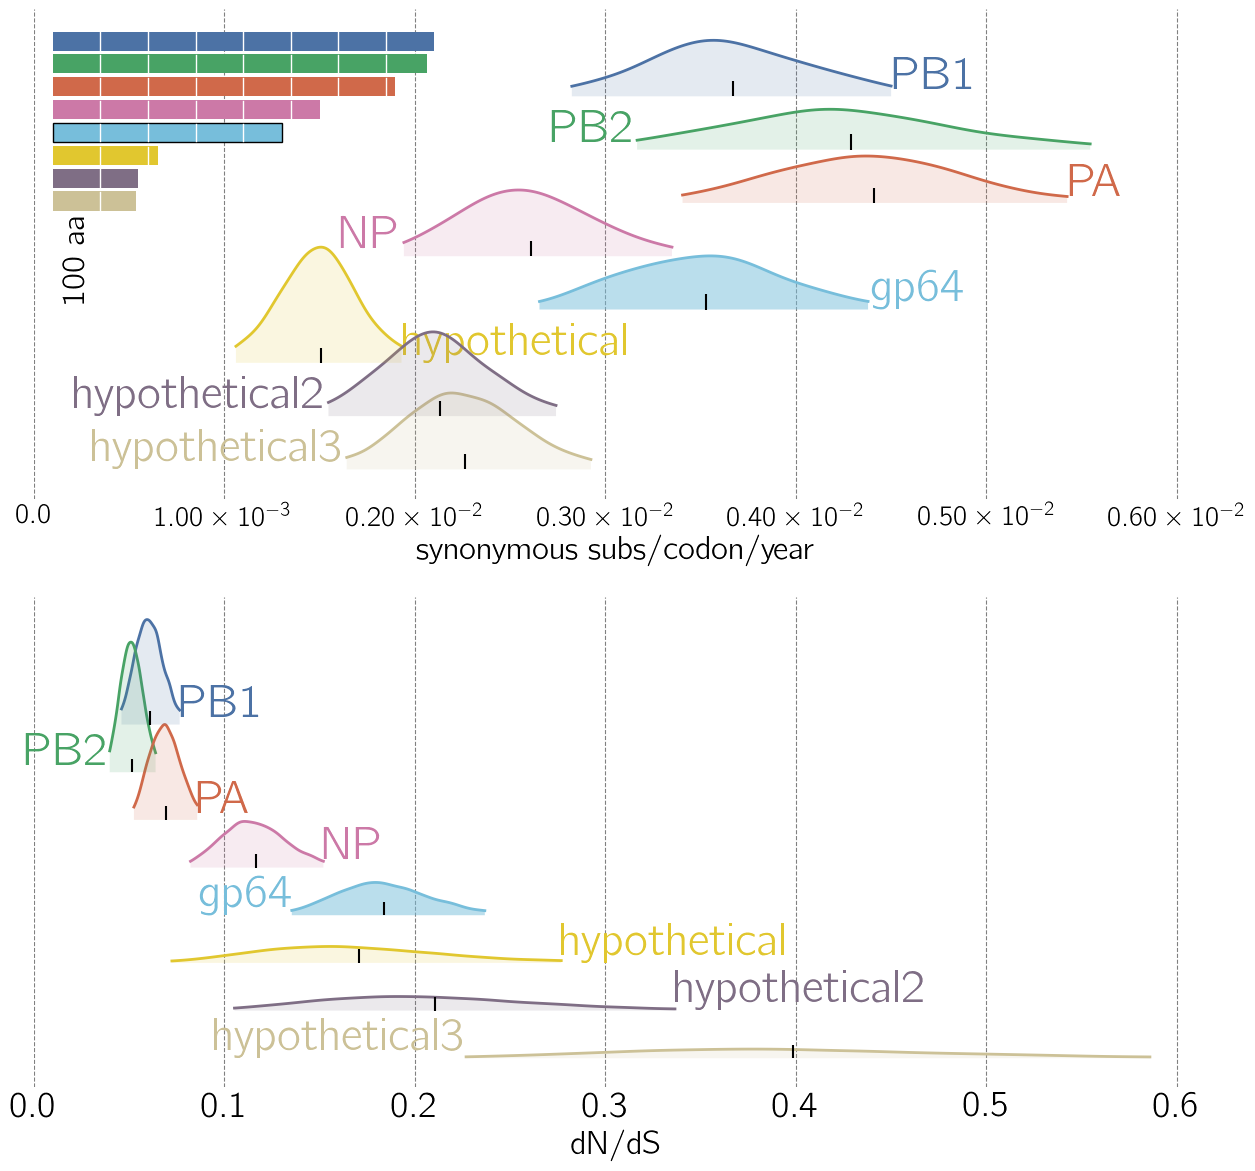

In [4]:
from scipy.stats import gaussian_kde
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(15, 14),facecolor='w') 
gs = GridSpec(2,1,wspace=0.01,hspace=0.2)

ax=plt.subplot(gs[0],facecolor='none')
ax2=plt.subplot(gs[1],facecolor='none')

segments=['PB1','PB2','PA','NP','gp64','hypothetical','hypothetical2','hypothetical3']


ypos=[]
colours={'PB1': "#4c72a5", 
         'PB2': "#48a365", 
         'PA': "#d0694a", 
         'NP': "#cc79a7", 
         'gp64': "#77bedb", 
         'hypothetical': "#e1c72f", 
         'hypothetical2': "#7f6e85", 
         'hypothetical3': "#ccc197"}

for i,seg in enumerate(segments[::-1]):
    print(seg)
    fc=colours[seg]
    
    scale=4e5
    L=lengths[seg]/scale
    x=0.1*10**-3
    y=3.4+i*0.3
    h=0.25
    
    if seg=='hypothetical3':
        ax.text(x+50/scale,y-0.01,'100 aa',color='k',size=24,rotation=90,va='center',ha='right',rotation_mode='anchor')
        
    for t in np.arange(0,L,100/scale):
        if t>0:
            ax.plot([x+t,x+t],[y+0.01,y+h-0.0099],color='w',lw=1,zorder=10001)
        
    ax.add_patch(Rectangle((x,y),L,h,facecolor=fc,edgecolor='none' if seg!='gp64' else 'k',clip_on=False,zorder=10000))
    
    new_y=0.7*i
    ypos.append(new_y+0.3)
    
    alpha=0.5 if seg=='gp64' else 0.15
    
    lw=2
    
    hpdLo,hpdHi=hpd(Ss[seg],0.95) ## 95% HPD for synonymous rate
    if seg not in ['PB1','PA','gp64','hypothetical']:
        ax.text(hpdLo-0.00001,new_y,seg,ha='right',va='bottom',size=34,color=fc)
    else:
        ax.text(hpdHi+0.00001,new_y,seg,ha='left',va='bottom',size=34,color=fc)
    
    
    #######
    rescale=0.0008
    plotKDE(ax,Ss[seg],new_y,facecolor=fc,edgecolor='none',alpha=alpha,zorder=100-i,rescale=rescale)
    plotKDE(ax,Ss[seg],new_y,outline=True,color=fc,lw=lw,zorder=20-i,rescale=rescale)
    
    ax.eventplot([np.mean(Ss[seg])],lineoffsets=new_y+0.1,linelengths=0.2,color='k',zorder=1000) ## indicate mean
    
    ########
    
    DNDS=[(raw_Ns[seg][i]/raw_Ss[seg][i])/(uNs[seg][i]/uSs[seg][i]) for i in range(len(raw_Ns[seg]))] ## compute dN/dS

    hpdLo,hpdHi=hpd(DNDS,0.95) ## 95% HPD for dN/dS
    if seg in ['PB2','gp64','hypothetical3']:
        ax2.text(hpdLo-0.00001,new_y,seg,ha='right',va='bottom',size=34,color=fc)
    else:
        ax2.text(hpdHi+0.00001,new_y,seg,ha='left',va='bottom',size=34,color=fc)
    
    rescale=0.03
    plotKDE(ax2,DNDS,new_y,facecolor=fc,edgecolor='none',alpha=alpha,zorder=100-i,rescale=rescale)
    plotKDE(ax2,DNDS,new_y,outline=True,color=fc,lw=lw,zorder=20-i,rescale=rescale)
    
    ax2.eventplot([np.mean(DNDS)],lineoffsets=new_y+0.1,linelengths=0.2,color='k',zorder=1000) ## indicate mean
    
    
########
ax.set_yticks([])
ax.set_yticklabels([])

ax2.set_yticks([])
ax2.set_yticklabels([])

########

ax.tick_params(axis='y',size=0)
ax.tick_params(axis='x',size=0,labelsize=20)
ax.grid(axis='x',ls='--',color='grey',zorder=0)

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in []]
########
ax2.tick_params(axis='y',size=0)
ax2.tick_params(axis='x',size=0,labelsize=26)
ax2.grid(axis='x',ls='--',color='grey',zorder=0)

[ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in []]


ax.set_xlabel('synonymous subs/codon/year',size=24)
ax2.set_xlabel('dN/dS',size=24)

ax.set_xlim(0.0,6.1*10**-3)
ax2.set_xlim(0.0,0.61)

fmt=lambda y,pos: '0.0' if (y==0.0 or y==np.nan) else r'$%.2f\times10^{%d}$'%(y*(10**-int(np.log10(y))),int(np.log10(y)))

ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

for tick in ax.get_xticklabels():
    tick.set_fontweight(400)


# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig4_synDNDS.png',bbox_inches='tight',dpi=300)
# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig4_synDNDS.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig7_synDNDS.png',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig7_synDNDS.tiff',bbox_inches='tight',dpi=100)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig7_synDNDS.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig7_synDNDS.eps',bbox_inches='tight',dpi=300)

plt.show()

In [5]:
# base_path='/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/data/Fig2'
base_path='/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/Fig2'

burnin=10e5
dnds={}
joint_posterior={}
lengths={}
for logfile in glob.glob(os.path.join(base_path,'gp64*.dNdS.log')):
    segment=os.path.basename(logfile).split('.')[0]
    
    for line in open(logfile,'r'):
        l=line.strip('\n').split('\t')
        if '#' not in line and l[0]=='state':
            header={int(x.split('[')[-1][:-1]) :i for i,x in enumerate(l) if x!='state'}
            dnds[segment]={idx: [] for idx in header}
            
            lengths[segment]=len(header)
        
        elif '#' not in line and int(l[0])>burnin:
            for site in header:
                dnds[segment][site].append(float(l[header[site]]))
        
    print(len(dnds[segment][1])) ## number of MCMC states
    joint_posterior[segment]=sum([dnds[segment][site] for site in dnds[segment]],[]) ## overal dN/dS
    dnds[segment]={site: (np.mean(dnds[segment][site]),hpd(dnds[segment][site])) for site in dnds[segment]} ## compute per-site mean and 95% HPD of dN/dS
    print(segment)
    print(logfile)

9000
gp64
/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/Fig2/gp64.rc.gp64.dated.dNdS.log


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


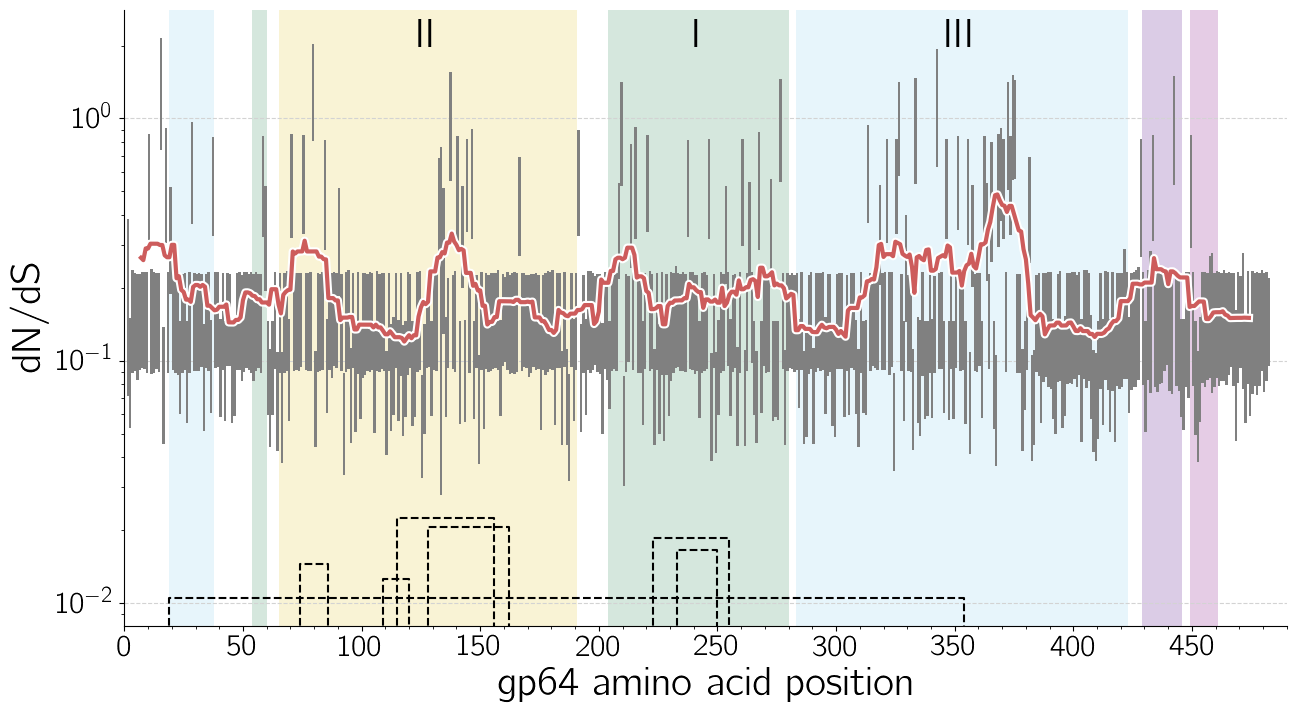

In [6]:
from matplotlib.collections import PatchCollection
from itertools import islice

def window(seq, n=2):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

fig = plt.figure(figsize=(15, 8),facecolor='w') 
gs = GridSpec(1,1,wspace=0.01,hspace=0.2)

ax=plt.subplot(gs[0],facecolor='none')

hpds=[]
mus=[]

for i in sorted(dnds['gp64']): ## iterate over gp64 sites
    mu,Hs=dnds['gp64'][i] ## fetch mean and HPDs of dN/dS
    hpdLo,hpdHi=Hs
    
    mus.append(mu)
    
    w=1.0
    hpds.append(Rectangle((i+((1-w)/2),hpdLo),w,hpdHi-hpdLo)) ## 95% HPD interval polygon
    
ax.add_collection(PatchCollection(hpds,facecolor='grey',edgecolor='none',zorder=2)) ## plot all 95% HPD intervals

w_size=15
pys=list(map(np.mean,window(mus,w_size))) ## mean sliding window across mean dN/dS

xs=range(int(w_size/2),int(len(pys)+w_size/2))

ax.plot(xs,pys,lw=3,color='indianred',zorder=10) ## plot sliding window in red
ax.plot(xs,pys,lw=6,color='w',zorder=8) ## plot sliding window in white


ax.plot()
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom','left']]

ax.grid(axis='y',ls='--',color='lightgrey')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.set_xlim(0,490)

ax.set_yscale('log')

ax.set_ylabel('dN/dS',size=30)
ax.set_xlabel('gp64 amino acid position',size=30)


domains={'I': ([(54,60),(204,280)],'seagreen'), 
         'II': ([(65,191)],"#e1c72f"), 
         'III': ([(19,38),(283,423)],'skyblue'), 
         'stem': ([(429,446)],'indigo'), 
         'TM': ([(449,461)],'purple')}

for d in domains: ## mark domains in colours
    fc=domains[d][-1]
    M=max([q[1]-q[0] for q in domains[d][0]])
    
    for span in domains[d][0]:
        b,e=span
        ax.axvspan(b,e,facecolor=fc,edgecolor='none',alpha=0.2,zorder=0)
        if (e-b)==M and d not in ['stem','TM']:
            ax.text((b+e)/2,2.6,d,ha='center',va='top',size=30)
    

cysteins=[(19,354), (74,86), (109,120), (115,156),(128,162),(223,255),(233,250)] ## putative cysteine bonds

for i,c in enumerate(sorted(cysteins,key=lambda w: w[1]-w[0])): ## plot cysteine bonds
    b,e=c
    j=0.0105+((i+1)%7)*0.002
    
    ax.plot([b,b,e,e],[0,j,j,0],color='k',ls='--')
    
# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig5_sitewiseDNDS.png',bbox_inches='tight',dpi=300)
# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig5_sitewiseDNDS.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig8_sitewiseDNDS.png',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig8_sitewiseDNDS.tiff',bbox_inches='tight',dpi=300)

plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig8_sitewiseDNDS.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig8_sitewiseDNDS.eps',bbox_inches='tight',dpi=300)

plt.show()

In [7]:
gp64_aln={}
pb1_aln={}

# gp64_p='/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/data/Fig2/gp64_2022_Aug_18.fasta'
# pb1_p='/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/data/Fig2/PB1_2022_Aug_18.fasta'
gp64_p='/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/Fig2/gp64_2022_Aug_18.fasta'
pb1_p='/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/data/Fig2/PB1_2022_Aug_18.fasta'

from Bio import SeqIO

for seq in SeqIO.parse(gp64_p,format='fasta'):
    s=seq.id.split('|')[1]
    gp64_aln[s]=str(seq.seq)
    
    
for seq in SeqIO.parse(pb1_p,format='fasta'):
    s=seq.id.split('|')[1]
    pb1_aln[s]=str(seq.seq)

In [8]:
pb1dist={}

for i,s1 in enumerate(pb1_aln):
    if s1 not in pb1dist: pb1dist[s1]={}
    for j,s2 in enumerate(pb1_aln):
        if s2 not in pb1dist[s1]: pb1dist[s1][s2]=None
        
        if j>i:
            D=[1 if a==b else 0 for a,b in zip(pb1_aln[s1],pb1_aln[s2]) if a not in ['X','-'] and b not in ['X','-']]
            valid=len(D)
            identity=sum(D)/valid
            pb1dist[s1][s2]=identity

gp64dist={}

for i,s1 in enumerate(gp64_aln):
    if s1 not in gp64dist: gp64dist[s1]={}
    for j,s2 in enumerate(gp64_aln):
        if s2 not in gp64dist[s1]: gp64dist[s1][s2]=None
        
        if j>i:
            D=[1 if a==b else 0 for a,b in zip(gp64_aln[s1],gp64_aln[s2]) if a not in ['X','-'] and b not in ['X','-']]
            valid=len(D)
            identity=sum(D)/valid
            gp64dist[s1][s2]=identity
#             gp64dist[s2][s1]=identity

In [9]:
shared=set()

for s in pb1dist:
    if s in gp64dist:
        shared.add(s)

for s in gp64dist:
    if s in pb1dist:
        shared.add(s)
        
print(len(shared))
print(shared)

40
{'Xiangshan_orthomyxo-like_virus', 'Mason_Creek_virus', 'Photinus_pyralis_orthomyxo-like_virus_1', 'Oz_virus', 'Thailand_tick_thogotovirus', 'Dhori_thogotovirus', 'Beihai_orthomyxo-like_virus_1', 'Tjuloc_virus', 'Lepidopteran_orthomyxo-related_virus_OKIAV178', 'Hymenopteran_orthomyxo-related_virus_OKIAV173', 'Photinus_pyralis_orthomyxo-like_virus_2', 'Hemipteran_orthomyxo-related_virus_OKIAV188', 'Sinu_virus', 'Guadeloupe_mosquito_quaranja-like_virus_1', 'Blattodean_orthomyxo-related_virus_OKIAV181', 'Old_quarry_swamp_virus', 'Upolu_virus', 'Coleopteran_orthomyxo-related_virus_OKIAV184', 'Hubei_orthomyxo-like_virus_2', 'Hubei_orthoptera_virus_6', 'Lestrade_virus', 'Varroa_orthomyxovirus-1', 'Solling_orthomyxo-like_virus', 'Johnston_Atoll_quaranjavirus', 'Hemipteran_orthomyxo-related_virus_OKIAV191', 'Aransas_Bay_virus', 'Granville_quaranjavirus', 'Jos_virus', 'Hemipteran_orthomyxo-related_virus_OKIAV183', 'Usinis_virus', 'Phasmatodean_orthomyxo-related_virus_OKIAV172', 'Bourbon_viru

In [10]:
xs=[]
ys=[]
print(shared)
labels=[]
for i,s1 in enumerate(shared):
    for j,s2 in enumerate(shared):
#         if j>i:
        
        x=pb1dist[s1][s2] if pb1dist[s1][s2] else pb1dist[s2][s1]
        y=gp64dist[s1][s2] if gp64dist[s1][s2] else gp64dist[s2][s1]
        xs.append(x)
        ys.append(y)
        labels.append('%s-%s'%(s1,s2))
        
        count=0
        if 'Wuhan_Mosquito_Virus_6' in labels[-1]:
            count+=1
        if 'Astopletus_virus' in labels[-1]:
            count+=1
        if 'Usinis_virus' in labels[-1]:
            count+=1
        if 'Guadeloupe_mosquito_quaranja-like_virus_1' in labels[-1]:
            count+=1
            
        if count>1:
            print(count,labels[-1])

{'Xiangshan_orthomyxo-like_virus', 'Mason_Creek_virus', 'Photinus_pyralis_orthomyxo-like_virus_1', 'Oz_virus', 'Thailand_tick_thogotovirus', 'Dhori_thogotovirus', 'Beihai_orthomyxo-like_virus_1', 'Tjuloc_virus', 'Lepidopteran_orthomyxo-related_virus_OKIAV178', 'Hymenopteran_orthomyxo-related_virus_OKIAV173', 'Photinus_pyralis_orthomyxo-like_virus_2', 'Hemipteran_orthomyxo-related_virus_OKIAV188', 'Sinu_virus', 'Guadeloupe_mosquito_quaranja-like_virus_1', 'Blattodean_orthomyxo-related_virus_OKIAV181', 'Old_quarry_swamp_virus', 'Upolu_virus', 'Coleopteran_orthomyxo-related_virus_OKIAV184', 'Hubei_orthomyxo-like_virus_2', 'Hubei_orthoptera_virus_6', 'Lestrade_virus', 'Varroa_orthomyxovirus-1', 'Solling_orthomyxo-like_virus', 'Johnston_Atoll_quaranjavirus', 'Hemipteran_orthomyxo-related_virus_OKIAV191', 'Aransas_Bay_virus', 'Granville_quaranjavirus', 'Jos_virus', 'Hemipteran_orthomyxo-related_virus_OKIAV183', 'Usinis_virus', 'Phasmatodean_orthomyxo-related_virus_OKIAV172', 'Bourbon_virus',

/tmp/ipykernel_682/39689270.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[0])
/tmp/ipykernel_682/39689270.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=copy.copy(mpl.cm.get_cmap('viridis',12))


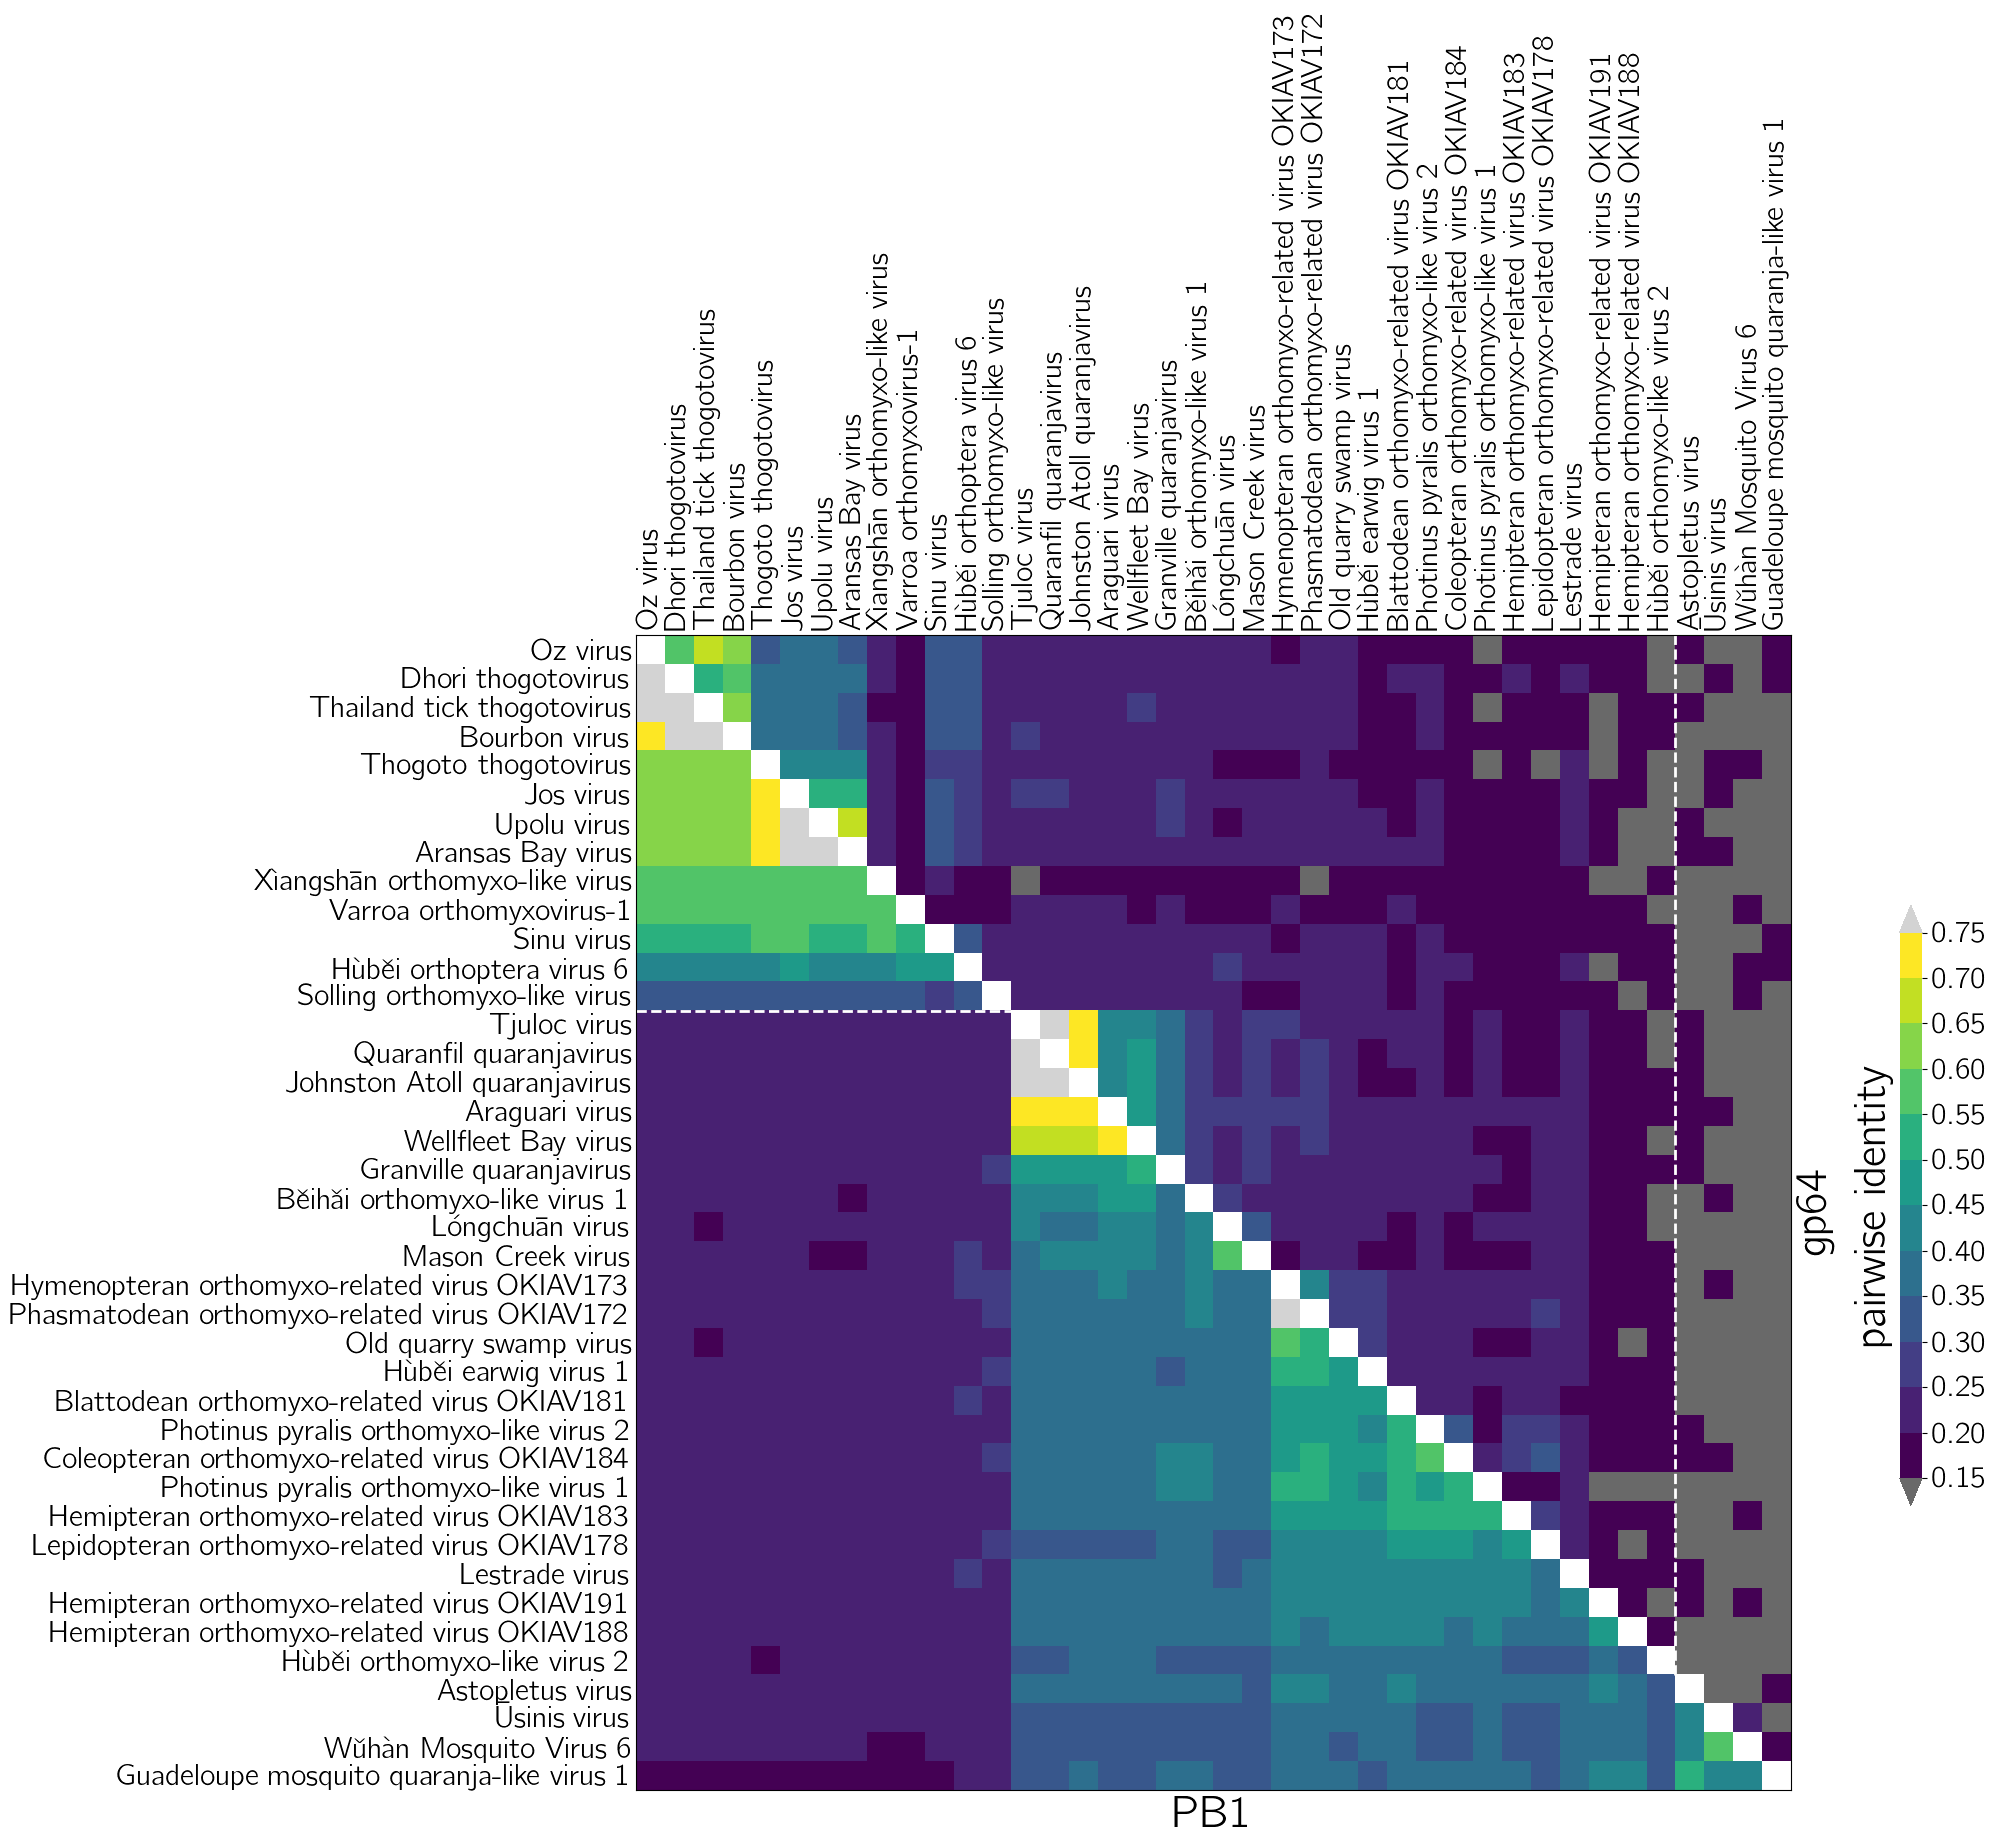

In [11]:
fig,_ = plt.subplots(figsize=(15,15),facecolor='w')

gs = GridSpec(1, 1,hspace=0.0,wspace=0.0)
ax = plt.subplot(gs[0])

matrix=np.zeros((len(shared),len(shared)))

order=['Oz_virus', 'Dhori_thogotovirus', 'Thailand_tick_thogotovirus', 'Bourbon_virus', 
       'Thogoto_thogotovirus', 'Jos_virus', 'Upolu_virus', 'Aransas_Bay_virus', 
       'Xiangshan_orthomyxo-like_virus', 'Varroa_orthomyxovirus-1', 'Sinu_virus', 
       'Hubei_orthoptera_virus_6','Solling_orthomyxo-like_virus', 'Tjuloc_virus', 
       'Quaranfil_quaranjavirus', 'Johnston_Atoll_quaranjavirus', 'Araguari_virus', 
       'Wellfleet_Bay_virus', 'Granville_quaranjavirus', 'Beihai_orthomyxo-like_virus_1', 
       'Longchuan_virus', 'Mason_Creek_virus', 'Hymenopteran_orthomyxo-related_virus_OKIAV173', 
       'Phasmatodean_orthomyxo-related_virus_OKIAV172', 
       'Old_quarry_swamp_virus', 'Hubei_earwig_virus_1', 'Blattodean_orthomyxo-related_virus_OKIAV181', 
       'Photinus_pyralis_orthomyxo-like_virus_2','Coleopteran_orthomyxo-related_virus_OKIAV184', 
       'Photinus_pyralis_orthomyxo-like_virus_1', 
       'Hemipteran_orthomyxo-related_virus_OKIAV183', 
       'Lepidopteran_orthomyxo-related_virus_OKIAV178', 'Lestrade_virus', 
       'Hemipteran_orthomyxo-related_virus_OKIAV191', 'Hemipteran_orthomyxo-related_virus_OKIAV188', 
       'Hubei_orthomyxo-like_virus_2', 'Astopletus_virus', 'Usinis_virus', 'Wuhan_Mosquito_Virus_6', 
       'Guadeloupe_mosquito_quaranja-like_virus_1']

for i in range(len(order)):
    for j in range(len(order)):
        x=order[i]
        y=order[j]
        
        matrix[i][j]=pb1dist[x][y] if pb1dist[x][y] else pb1dist[y][x]
        matrix[j][i]=gp64dist[x][y] if gp64dist[x][y] else gp64dist[y][x]

import copy
cmap=copy.copy(mpl.cm.get_cmap('viridis',12))
cmap.set_over('lightgrey')
cmap.set_under('dimgrey')

norm=mpl.colors.Normalize(0.15,0.75)
ax.imshow(matrix,cmap=cmap,norm=norm)

ax.set_xticks(range(len(order)))
ax.set_xticklabels([add_diacritics(x.replace('_',' ')) for x in order],rotation=90)

ax.set_yticks(range(len(order)))
ax.set_yticklabels([add_diacritics(x.replace('_',' ')) for x in order])

ax.tick_params(size=0)

ax.plot([len(order)-4.5,len(order)-4.5],[len(order)-4.5,-0.5],color='w',lw=2,ls='--')

ax.plot([-0.5,12.5],[12.5,12.5],color='w',lw=2,ls='--')

ax.xaxis.tick_top()
ax.yaxis.set_label_position('right')

ax.set_xlabel('PB1',size=32)
ax.set_ylabel('gp64',size=32)

axcb = fig.add_axes([0.97, 0.3, 0.015, 0.4], frame_on=False)

cb = mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=norm,extend='both',orientation='vertical',alpha=1.0,drawedges=False)
axcb.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))

axcb.yaxis.set_label_position('left')
axcb.set_ylabel('pairwise identity',size=32)

# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig6_idMatrix.png',bbox_inches='tight',dpi=300)
# plt.savefig('/Users/evogytis/Documents/manuscripts/wuhan6-phylodynamics/figures/SuppFig6_idMatrix.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig9_idMatrix.png',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig9_idMatrix.tiff',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig9_idMatrix.pdf',bbox_inches='tight',dpi=300)
plt.savefig('/mnt/c/Users/evogytis/repos/orthomyxo-metagenomics/manuscript/JournalOfVirology-revision1/SuppFig9_idMatrix.eps',bbox_inches='tight',dpi=300)

plt.show()